In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
from cartopy import crs as ccrs
import pandas as pd
import dask
import netCDF4

In [3]:
with xr.open_dataset(r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202002.nc') as f:
    rgl_202022 = f.load()

In [7]:
rgl_202022

<xarray.Dataset>
Dimensions:               (time: 696, lon: 391, lat: 293, lev: 1, height: 20)
Coordinates:
  * time                  (time) datetime64[ns] 2020-02-01 ... 2020-02-29T23:...
  * lon                   (lon) float32 -97.9 -97.55 -97.2 ... 38.68 39.03 39.38
  * lat                   (lat) float32 10.73 10.96 11.2 ... 78.59 78.82 79.06
  * lev                   (lev) |S1 b'F'
  * height                (height) float32 500.0 1.5e+03 ... 1.85e+04 1.95e+04
Data variables: (12/16)
    fp                    (lat, lon, time) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    temperature           (time) float32 9.252 9.127 9.183 ... 5.117 3.913 4.2
    pressure              (time) float32 974.9 974.2 974.1 ... 957.5 958.2 957.8
    wind_speed            (time) float32 11.52 12.25 10.49 ... 14.96 12.22 13.96
    wind_direction        (time) float32 227.7 231.1 229.2 ... 243.5 219.7 225.8
    PBLH                  (time) float32 402.1 231.0 568.3 ... 355.0 716.5
    ...                    ...
    particle_locations_s  (height, lon, time) float32 0.0 0.0 0.0 ... 0.0 0.0
    particle_locations_w  (height, lat, time) float32 0.0 0.0 0.0 ... 0.0 0.0
    mean_age_particles_n  (height, lon, time) float32 566.9 0.0 ... 0.0 0.0
    mean_age_particles_e  (height, lat, time) float32 0.0 0.0 0.0 ... 0.0 0.0
    mean_age_particles_s  (height, lon, time) float32 0.0 0.0 0.0 ... 0.0 0.0
    mean_age_particles_w  (height, lat, time) float32 0.0 0.0 0.0 ... 0.0 0.0
Attributes: (12/14)
    fp_output_units:          ppm s
    fp_output:                Mixing Ratio
    species:                  Rn
    species_lifetime_hrs:     132.3768
    model:                    NAME
    met_model:                UKV
    ...                       ...
    domain:                   EUROPE
    site:                     RGL
    inlet_height:             90magl
    ACRG_repository_version:  v0.2.0-22-gca6dc68
    author:                   ag12733
    created:                  2021-04-30 10:18:10.035271

In [8]:
rgl_202022.attrs

{'fp_output_units': 'ppm s',
 'fp_output': 'Mixing Ratio',
 'species': 'Rn',
 'species_lifetime_hrs': 132.3768,
 'model': 'NAME',
 'met_model': 'UKV',
 'output_folder': 'MixR_hourly',
 'model_version': 'NAME III (version 7.2)                                          ',
 'domain': 'EUROPE',
 'site': 'RGL',
 'inlet_height': '90magl',
 'ACRG_repository_version': 'v0.2.0-22-gca6dc68',
 'author': 'ag12733',
 'created': '2021-04-30 10:18:10.035271'}

In [10]:
rgl_202022.fp.attrs

{'units': '(mol/mol)/(mol/m2/s)', 'loss_lifetime_hrs': '132.3768'}

(array([7.9735336e+07, 3.9800000e+02, 7.9000000e+01, 1.9000000e+01,
        8.0000000e+00, 4.0000000e+00, 0.0000000e+00, 2.0000000e+00,
        1.0000000e+00, 1.0000000e+00]),
 array([0.        , 0.21870498, 0.43740997, 0.65611494, 0.87481993,
        1.09352493, 1.31222987, 1.53093493, 1.74963987, 1.96834493,
        2.18704987]),
 <BarContainer object of 10 artists>)

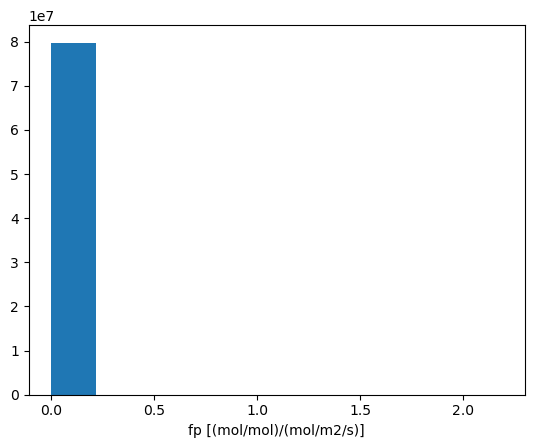

In [11]:
rgl_202022.fp.plot()

In [ ]:
# Okay, not what I was expecting. 
# Do I make it into a line chart by taking those measurements per month? 
# No because you should have different measurements per day. 
# Is this where I should be rigridding to make it into a line graph?

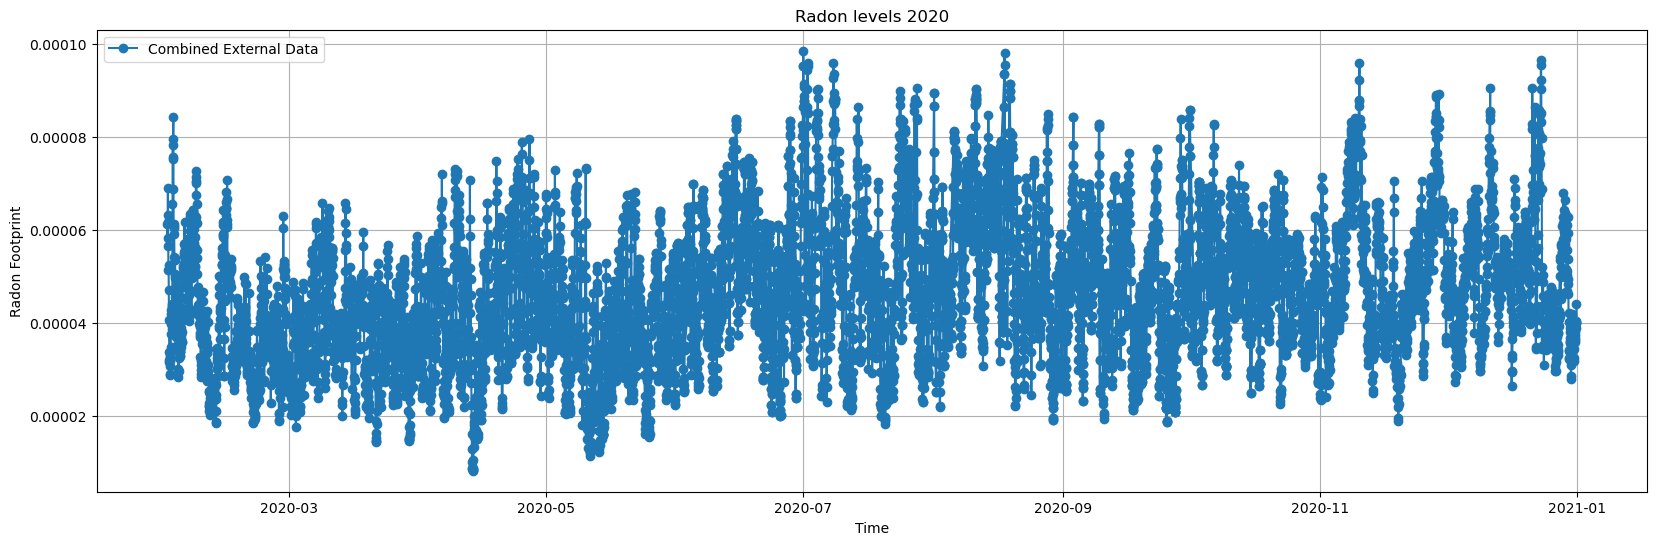

In [18]:
# Will plot the graphs by the year then break down into months in order to see peaks and troughs
#months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# data for two months to check will work before doing the rest 
file_path1 = r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202002.nc'
file_path2 = r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202003.nc' 
file_path3 = r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202004.nc'
file_path4 = r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202005.nc'
file_path5 = r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202006.nc'
file_path6 = r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202007.nc'
file_path7 = r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202008.nc'
file_path8 = r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202009.nc'
file_path9 = r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202010.nc'
file_path10 = r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202011.nc'
file_path11 = r'C:\Users\wilse\Documents\Final_project\RGL-90magl_UKV_rn_EUROPE_202012.nc'

external_data1 = xr.open_dataset(file_path1)
external_data2 = xr.open_dataset(file_path2)  
external_data3 = xr.open_dataset(file_path3)
external_data4 = xr.open_dataset(file_path4)
external_data5 = xr.open_dataset(file_path5)
external_data6 = xr.open_dataset(file_path6)
external_data7 = xr.open_dataset(file_path7)
external_data8 = xr.open_dataset(file_path8)
external_data9 = xr.open_dataset(file_path9)
external_data10 = xr.open_dataset(file_path10)
external_data11 = xr.open_dataset(file_path11)

# Concatenate the datasets along the time dimension with explicit dimension specification
combined_data = xr.concat([external_data1, external_data2, external_data3, external_data4, external_data5, external_data6, external_data7, external_data8, external_data9, external_data10, external_data11], dim='time', coords='minimal')

# Plotting
plt.figure(figsize=(20, 6))

# Plot combined external data
plt.plot(combined_data['time'], combined_data['fp'].mean(dim=('lat', 'lon')), label='Combined External Data', marker='o')
# Assuming 'lat' and 'lon' are dimensions in dataset

# Customize the plot
plt.title('Radon levels 2020')
plt.xlabel('Time')
plt.ylabel('Radon Footprint')
plt.legend()  
plt.grid(True)

# Show the plot
plt.show()



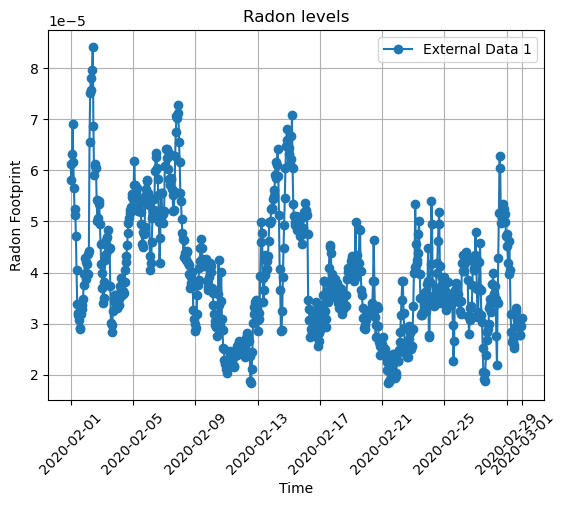

In [24]:
#Feb
# Extract the data variable
fp_data1 = external_data1['fp']

# Plotting
plt.plot(fp_data1['time'], fp_data1.mean(dim=('lat', 'lon')), label='External Data 1', marker='o')

# Customize the plot
plt.title('Radon levels')
plt.xlabel('Time')
plt.ylabel('Radon Footprint')
plt.legend()  
plt.grid(True)

plt.xticks(rotation=45)

# Show the plot
plt.show()

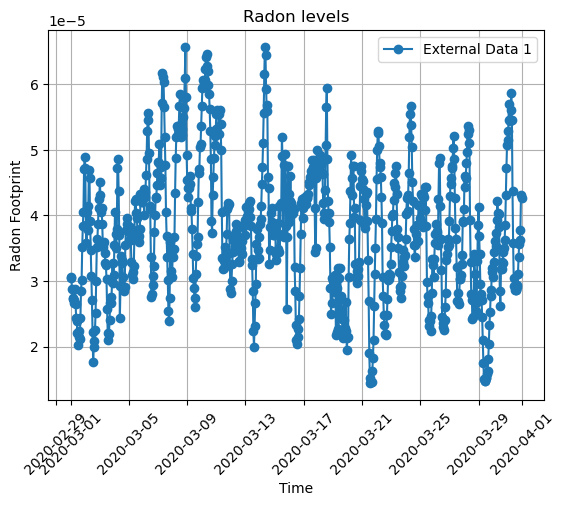

In [25]:
#march
# Extract the data variable
fp_data2 = external_data2['fp']

# Plotting
plt.plot(fp_data2['time'], fp_data2.mean(dim=('lat', 'lon')), label='External Data 1', marker='o')

# Customize the plot
plt.title('Radon levels')
plt.xlabel('Time')
plt.ylabel('Radon Footprint')
plt.legend()  # Show legend with dataset labels
plt.grid(True)

plt.xticks(rotation=45)

# Show the plot
plt.show()

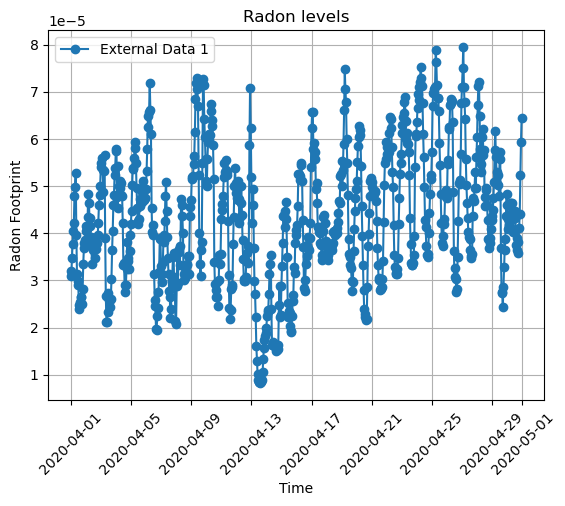

In [26]:
#april
# Extract the data variable
fp_data3 = external_data3['fp']

# Plotting
plt.plot(fp_data3['time'], fp_data3.mean(dim=('lat', 'lon')), label='External Data 1', marker='o')

# Customize the plot
plt.title('Radon levels')
plt.xlabel('Time')
plt.ylabel('Radon Footprint')
plt.legend()  # Show legend with dataset labels
plt.grid(True)

plt.xticks(rotation=45)

# Show the plot
plt.show()

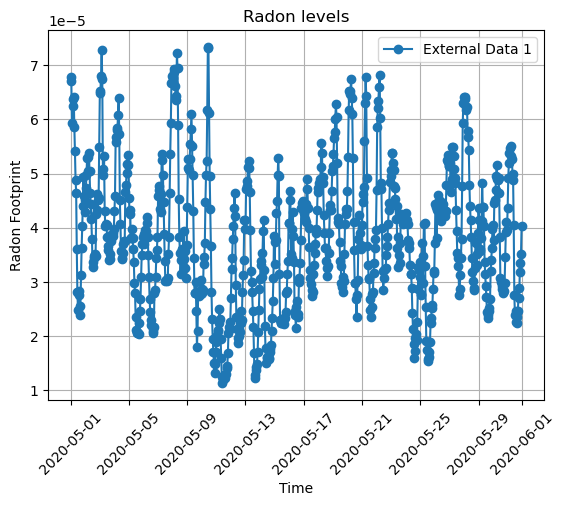

In [27]:
#May 

fp_data4 = external_data4['fp']

plt.plot(fp_data4['time'], fp_data4.mean(dim=('lat', 'lon')), label='External Data 1', marker='o')

plt.title('Radon levels')
plt.xlabel('Time')
plt.ylabel('Radon Footprint')
plt.legend()  
plt.grid(True)

plt.xticks(rotation=45)


plt.show()

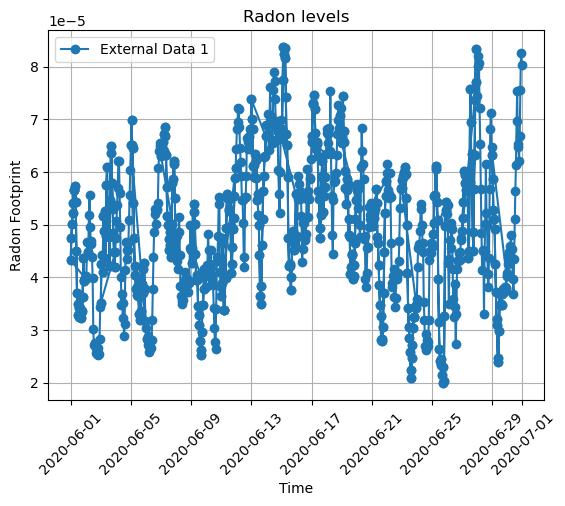

In [28]:
#june

fp_data5 = external_data5['fp']

plt.plot(fp_data5['time'], fp_data5.mean(dim=('lat', 'lon')), label='External Data 1', marker='o')

plt.title('Radon levels')
plt.xlabel('Time')
plt.ylabel('Radon Footprint')
plt.legend()  
plt.grid(True)

plt.xticks(rotation=45)


plt.show()

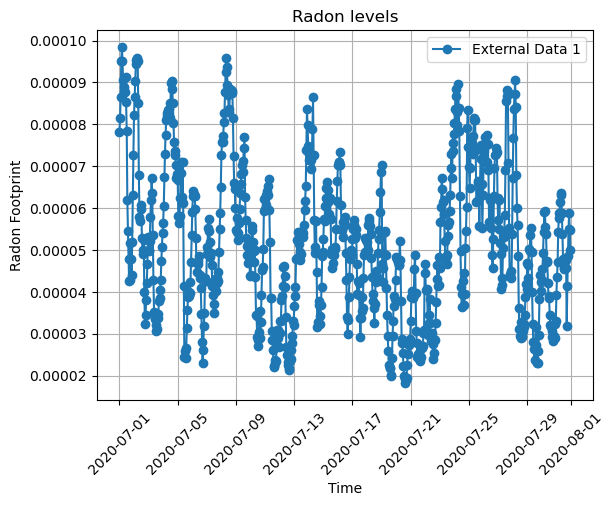

In [29]:
# july

fp_data6 = external_data6['fp']

plt.plot(fp_data6['time'], fp_data6.mean(dim=('lat', 'lon')), label='External Data 1', marker='o')

plt.title('Radon levels')
plt.xlabel('Time')
plt.ylabel('Radon Footprint')
plt.legend()  
plt.grid(True)

plt.xticks(rotation=45)


plt.show()

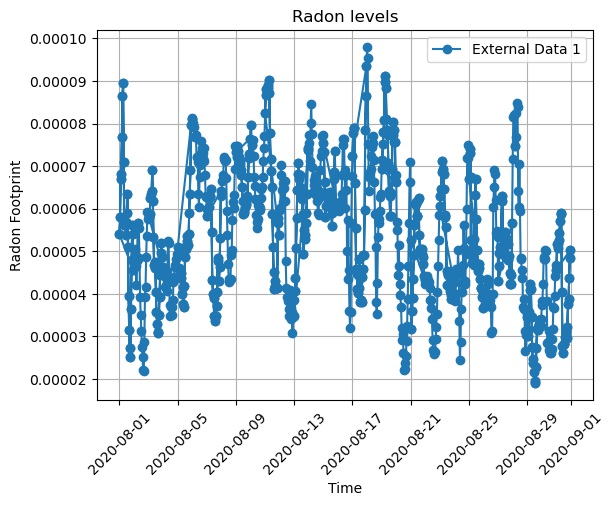

In [30]:
#August 

fp_data7 = external_data7['fp']

plt.plot(fp_data7['time'], fp_data7.mean(dim=('lat', 'lon')), label='External Data 1', marker='o')

plt.title('Radon levels')
plt.xlabel('Time')
plt.ylabel('Radon Footprint')
plt.legend()  
plt.grid(True)

plt.xticks(rotation=45)


plt.show()

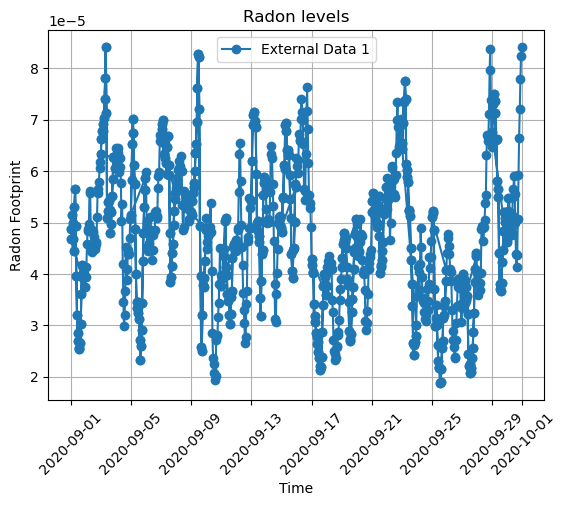

In [31]:
# September

fp_data8 = external_data8['fp']

plt.plot(fp_data8['time'], fp_data8.mean(dim=('lat', 'lon')), label='External Data 1', marker='o')

plt.title('Radon levels')
plt.xlabel('Time')
plt.ylabel('Radon Footprint')
plt.legend()  
plt.grid(True)

plt.xticks(rotation=45)


plt.show()

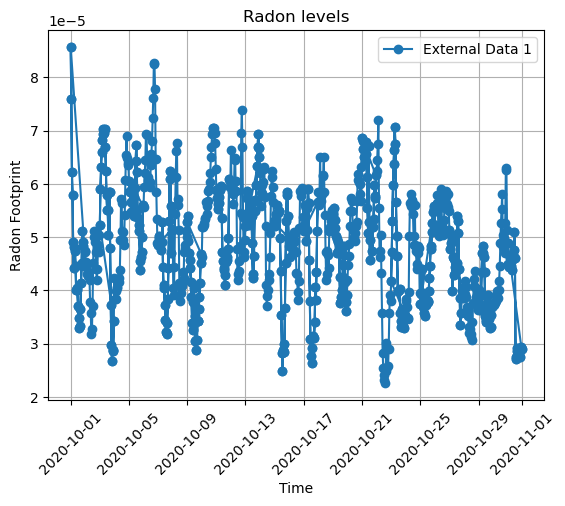

In [32]:
#October 

fp_data9 = external_data9['fp']

plt.plot(fp_data9['time'], fp_data9.mean(dim=('lat', 'lon')), label='External Data 1', marker='o')

plt.title('Radon levels')
plt.xlabel('Time')
plt.ylabel('Radon Footprint')
plt.legend()  
plt.grid(True)

plt.xticks(rotation=45)


plt.show()

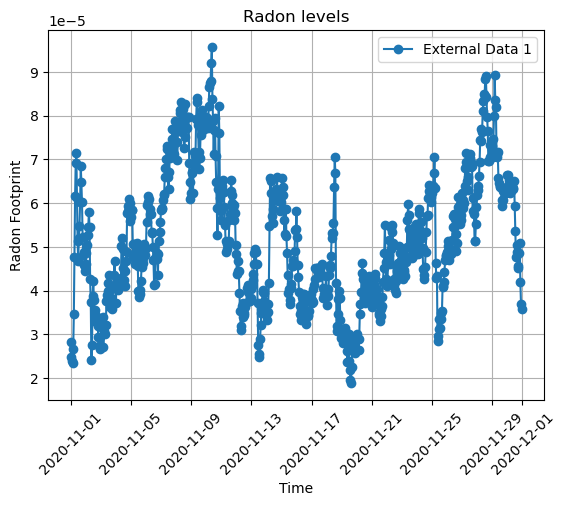

In [33]:
#November 

fp_data10 = external_data10['fp']

plt.plot(fp_data10['time'], fp_data10.mean(dim=('lat', 'lon')), label='External Data 1', marker='o')

plt.title('Radon levels')
plt.xlabel('Time')
plt.ylabel('Radon Footprint')
plt.legend()  
plt.grid(True)

plt.xticks(rotation=45)


plt.show()

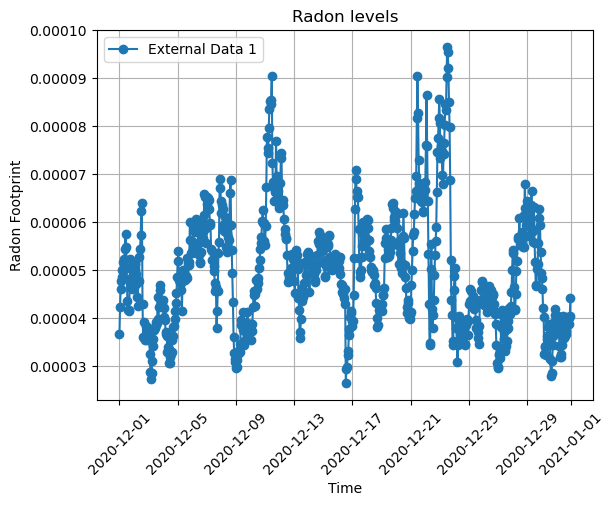

In [34]:
#December  

fp_data11 = external_data11['fp']

plt.plot(fp_data11['time'], fp_data11.mean(dim=('lat', 'lon')), label='External Data 1', marker='o')

plt.title('Radon levels')
plt.xlabel('Time')
plt.ylabel('Radon Footprint')
plt.legend()  
plt.grid(True)

plt.xticks(rotation=45)


plt.show()